In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

IMAGE_SIZE = [350 , 350]

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Νέα ενότητα

In [3]:
import os
import zipfile


zip_file_path = r'/content/drive/MyDrive/archive.zip'
extraction_dir = r'/content/drive/MyDrive/extracted.zip'


#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extraction_dir)

# Define the paths to your train, test, and eval data folders within the extraction directory
train_data_dir = os.path.join(extraction_dir, 'train')
test_data_dir = os.path.join(extraction_dir, 'test')
eval_data_dir = os.path.join(extraction_dir, 'valid')


Working with 15750 images
Image examples: 
-78.92859,48.1283.jpg


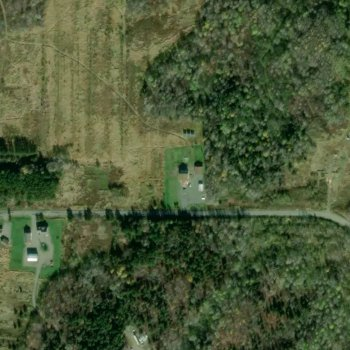

-78.9288,46.99131.jpg


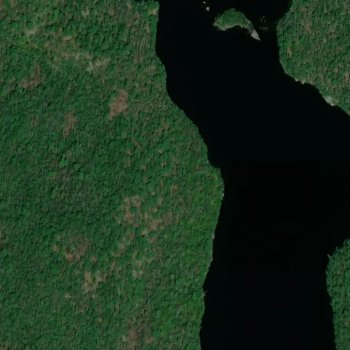

-78.92975,48.26169.jpg


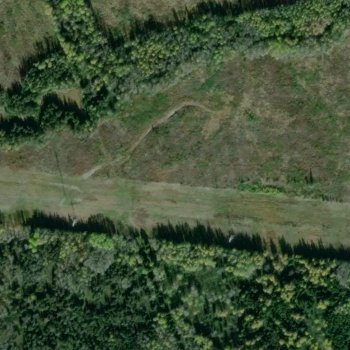

-78.93015,48.95714.jpg


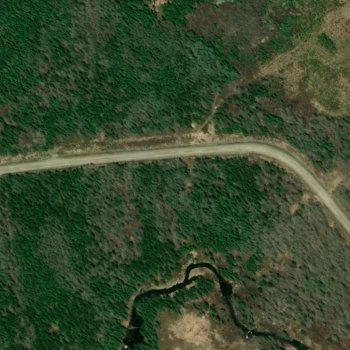

-78.93169,46.79856.jpg


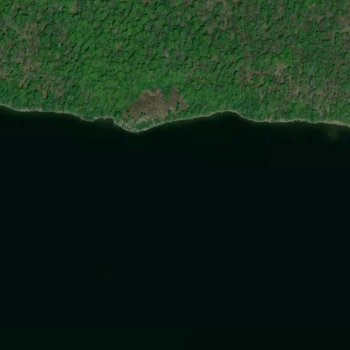

-78.93248,48.24401.jpg


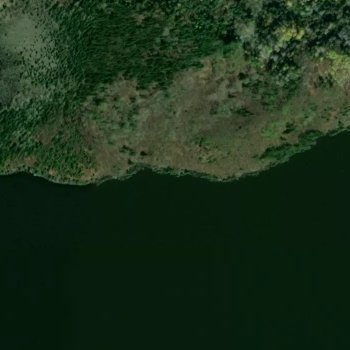

-78.93311,48.79317.jpg


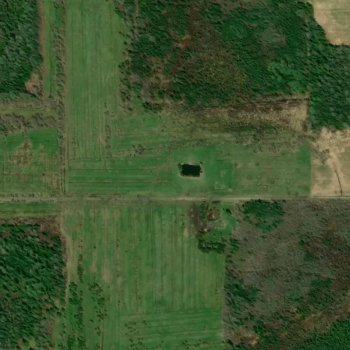

-78.93429,46.81925.jpg


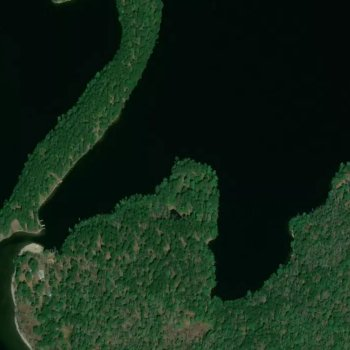

-78.93461,48.69095.jpg


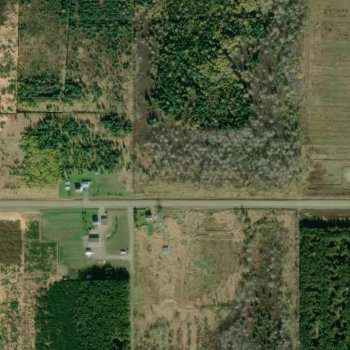

-78.93476,47.51079.jpg


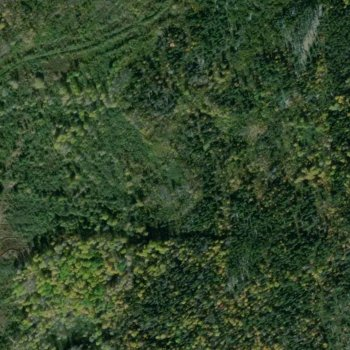

In [6]:
from PIL import Image
from IPython.display import display
from IPython.display import Image as _Imgdis

folder = train_data_dir+'/wildfire'

onlywildfire = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlywildfire)))
print("Image examples: ")


for i in range(10):
    print(onlywildfire[i])
    display(_Imgdis(filename=folder + "/" + onlywildfire[i], width=350, height=350))


In [6]:
from keras.src.applications.resnet import ResNet50
from keras.src.applications.nasnet import NASNetLarge
from keras.src.applications.efficientnet_v2 import EfficientNetV2L
from keras.src.applications.vgg19 import VGG19
from keras.src.applications.efficientnet import EfficientNetB7
from keras.src.applications import ResNet152V2
from keras.api._v2.keras.applications import Xception
vgg = VGG16(input_shape = IMAGE_SIZE + [3] , weights='imagenet', include_top=False)
vgg19 = VGG19(input_shape = IMAGE_SIZE + [3] , weights='imagenet', include_top=False)
#vgg.output
resnet_v2 = ResNet152V2(input_shape = IMAGE_SIZE + [3] , weights='imagenet', include_top=False)
xception = Xception(input_shape = IMAGE_SIZE + [3] , weights='imagenet', include_top=False)
efficient_net = EfficientNetB7(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
nas_net_large = NASNetLarge(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet_50 = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)
efficient_net_v2l = EfficientNetV2L(input_shape = IMAGE_SIZE + [3] , weights='imagenet', include_top=False)

473176280/473176280 [==============================] - 4s 0us/step


In [7]:
for layer in vgg.layers:
  #that means that all the layers will not be trained again.
  layer.trainable = False

for layer in vgg19.layers:
  layer.trainable = False

for layer in xception.layers:
  layer.trainable = False

for layer in resnet_v2.layers:
  layer.trainable = False

for layer in efficient_net.layers:
  layer.trainable = False

for layer in efficient_net_v2l.layers:
  layer.trainable = False

for layer in nas_net_large.layers:
  layer.trainable = False

for layer in resnet_50.layers:
  layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/extracted.zip/train/*')
print(len(folders))

2


In [9]:
x = Flatten()(resnet_50.output)#that means that if the before has 1000 neurons , the next will have 1000 neurons
prediction = Dense(len(folders), activation='sigmoid')(x)
#len(folders) is basically the number of classes, for activation
#is softmax or sigmoid
model = Model(inputs=resnet_50.input, outputs=prediction)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 350, 350, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 356, 356, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 175, 175, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 175, 175, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.9 MB/s eta 0:00:00


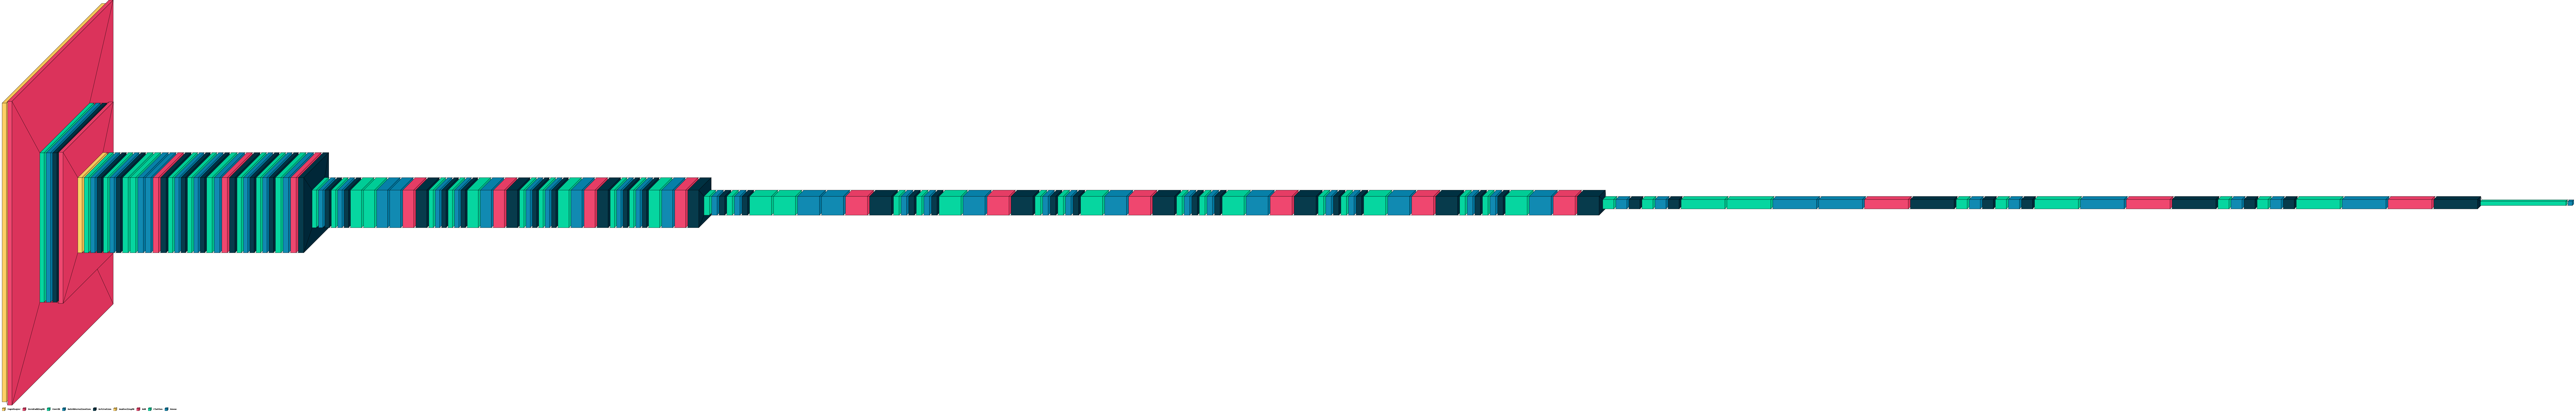

In [11]:
#MODEL VIWER
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

In [12]:
#COMPILING CELL
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [13]:
train_datagen = ImageDataGenerator(
    #make sure we will make the same preprocess steps
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [14]:
train_set = train_datagen.flow_from_directory(train_data_dir,
                                              target_size=(350,350),
                                              batch_size=16,
                                              class_mode='categorical')

Found 30250 images belonging to 2 classes.


In [15]:
test_set = train_datagen.flow_from_directory(test_data_dir,
                                             target_size=(350,350),
                                             batch_size=16,
                                             class_mode='categorical')

Found 6300 images belonging to 2 classes.


In [16]:
eval_set = train_datagen.flow_from_directory(eval_data_dir,
                                             target_size=(350,350),
                                             batch_size=16,
                                             class_mode='categorical')

Found 6300 images belonging to 2 classes.


In [48]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


checkpoint = ModelCheckpoint(filepath='wildfire_model_resnet_50.h5',
                             verbose=2,save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()
model_history = model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=5,
    validation_steps=16,
    callbacks=callbacks,
    verbose=2
)

<ipython-input-48-5683e870fd46>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/10

Epoch 1: val_loss improved from inf to 4.91986, saving model to wildfire_model_resnet_50.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 - 129s - loss: 2.1151 - accuracy: 0.8750 - val_loss: 4.9199 - val_accuracy: 0.9336 - 129s/epoch - 26s/step
Epoch 2/10

Epoch 2: val_loss improved from 4.91986 to 1.61741, saving model to wildfire_model_resnet_50.h5
5/5 - 175s - loss: 3.4300 - accuracy: 0.9000 - val_loss: 1.6174 - val_accuracy: 0.9336 - 175s/epoch - 35s/step
Epoch 3/10

Epoch 3: val_loss did not improve from 1.61741
5/5 - 176s - loss: 4.0621 - accuracy: 0.8750 - val_loss: 1.8114 - val_accuracy: 0.9297 - 176s/epoch - 35s/step
Epoch 4/10

Epoch 4: val_loss did not improve from 1.61741
5/5 - 174s - loss: 2.1202 - accuracy: 0.9375 - val_loss: 3.5806 - val_accuracy: 0.8828 - 174s/epoch - 35s/step
Epoch 5/10

Epoch 5: val_loss improved from 1.61741 to 1.45321, saving model to wildfire_model_resnet_50.h5
5/5 - 174s - loss: 4.8994 - accuracy: 0.8625 - val_loss: 1.4532 - val_accuracy: 0.9492 - 174s/epoch - 35s/step
Epoch 6/10

Epoch 6: val_loss did not improve from 1.45321
5/5 - 120s - loss: 1.9301 - accuracy: 0.9250 - val_l

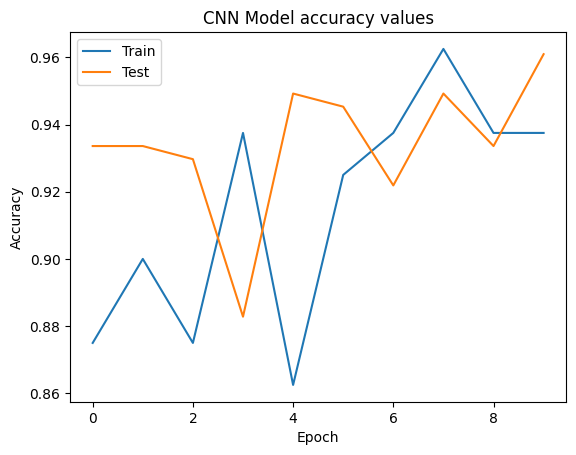

In [49]:
#PLOTING

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
#HOW TO LOAD AN .H5 MODEL TO CHECK THE ACCURACY
import tensorflow as tf
load_model = tf.keras.models.load_model('wildfire_model_vgg19_sigmoid.h5')

#load_model.summary()

loss, acc = load_model.evaluate(test_set)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

OSError: ignored